# <span style="color:darkblue"> Lecture 12: Application 2 - Random Assignment </span>

<font size = "5">



# <span style="color:darkblue"> I. Import Libraries and Data </span>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
carfeatures = pd.read_csv("data_raw/features.csv")

In [5]:
print(carfeatures.head())

    mpg  cylinders  displacement horsepower  weight  acceleration vehicle_id
0  18.0          8           307        130    3504          12.0  C-1689780
1  15.0          8           350        165    3693          11.5  B-1689791
2  18.0          8           318        150    3436          11.0  P-1689802
3  16.0          8           304        150    3433          12.0  A-1689813
4  17.0          8           302        140    3449          10.5  F-1689824


# <span style="color:darkblue"> I. Random Assignment </span>

<font size = "5">

Random assignment is crucial for scientific progress ...

- The basis for medical trials
- Also used in engineering, the natural sciences and <br>
  social sciences (economics, political science, etc.)


In [41]:
# "list_status" is a list with "treatment/control" arms
# "prop_status" is the proportion in the treatment and control arms
# "size_dataset" is how many rows are contained

list_status  = ["Treatment","Control"]
prop_status  = [0.4,0.6]
size_dataset = len(carfeatures)

<font size = "5">
Random assignment


In [40]:
# The "np.random.choice" will create a vector with the status
# We will save this to a column in "carfeatures"
# Note: (i) We can always split the arguments of a function in multiple lines
#           to make it easier to read
#       (ii) 

carfeatures["status"] = np.random.choice(list_status,
                                         size = size_dataset,
                                         p = prop_status)

display(carfeatures)

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status
0,18.0,8,307,130,3504,12.0,C-1689780,Treatment
1,15.0,8,350,165,3693,11.5,B-1689791,Control
2,18.0,8,318,150,3436,11.0,P-1689802,Control
3,16.0,8,304,150,3433,12.0,A-1689813,Treatment
4,17.0,8,302,140,3449,10.5,F-1689824,Control
...,...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103,Treatment
394,44.0,4,97,52,2130,24.6,V-1694114,Treatment
395,32.0,4,135,84,2295,11.6,D-1694125,Control
396,28.0,4,120,79,2625,18.6,F-1694136,Control


<font size = "5">

Compute frequencies by status

In [39]:
# The command "pd.crosstab" computes frequencies
# If we add the option "normalize" it will compute proportions
# Note: The default assignment is done randomly without replacement
#       which means that the proportions are approximately the same   
#       (but not equal) to "prop_status"

frequency_table   = pd.crosstab(index = carfeatures["status"], columns = "Frequency")
proportions_table = pd.crosstab(index = carfeatures["status"],
                                columns = "Frequency",
                                normalize = True)

display(frequency_table)
display(proportions_table)


col_0,Frequency
status,
Control,251
Treatment,147


col_0,Frequency
status,
Control,0.630653
Treatment,0.369347


<font size = "5">

Query with string conditions

In [44]:
# When you have queries for text variables, it's important
# to use outer ' ' single quotations
# and inner double quotations.

data_treated = carfeatures.query('status == "Treatment" ')
data_control = carfeatures.query('status == "Control" ')

<font size = "5">

Treated/control should be similar

- This is the key principle of random assignment
- We can check the summary statistics

In [46]:
# The count is different because we assigned different proportions
# All other sumary statistics are approximately the same
# They are not identical because the assignment is random

display(data_treated.describe())
display(data_control.describe())

,mpg,cylinders,displacement,weight,acceleration
count,145.000000,145.000000,145.000000,145.000000,145.000000
mean,23.656552,5.558621,194.965517,2999.124138,15.622069
std,8.487383,1.735559,103.989477,862.268865,2.806626
min,9.000000,4.000000,68.000000,1760.000000,9.500000
25%,17.000000,4.000000,98.000000,2200.000000,13.900000
50%,22.000000,4.000000,144.000000,2910.000000,15.000000
75%,29.900000,8.000000,302.000000,3672.000000,17.300000
max,46.600000,8.000000,455.000000,5140.000000,24.600000


,mpg,cylinders,displacement,weight,acceleration
count,253.000000,253.000000,253.000000,253.000000,253.000000
mean,23.433202,5.395257,192.545455,2953.976285,15.537154
std,7.420168,1.681451,104.624019,839.151120,2.734372
min,10.000000,3.000000,70.000000,1613.000000,8.000000
25%,17.500000,4.000000,105.000000,2245.000000,13.800000
50%,23.000000,4.000000,151.000000,2735.000000,15.500000
75%,28.800000,6.000000,258.000000,3563.000000,17.000000
max,44.600000,8.000000,455.000000,4997.000000,24.800000


## <span style="color:darkblue"> III. Quiz Structure </span>

<font size = "5">

The day of the quiz I will ...
- Provide a dataset with information
- Give more specific instructions.
- Below, you will see the type of questions that will be asked.
- The idea is for you to apply known concepts to new data
- You have 50 minutes to complete the assignment

Questions

(exact wording may change in quiz, but exercise will be very similar)


<font size = "5">

(a) Create a function and apply it to a column

- Check Lecture 8 for how to define a function
- The function will have if/else statements and output a string
- You will use ".apply()" to create a new variable in the dataset <br>
(see Lecture 9)

In [10]:
import pandas as pd

def categorize_efficiency(mpg):
    if mpg >= 30:
        return "Very efficient"
    elif mpg >= 20:
        return "Moderately efficient"
    else:
        return "Not very efficient"

carfeatures = pd.read_csv("data_raw/features.csv") # read the csv file into a DataFrame

carfeatures['Efficiency'] = carfeatures['mpg'].apply(categorize_efficiency)  # apply the function to the mpg column and store the result in a new column called 'Efficiency'

print(carfeatures.head())  # print the first few rows of the DataFrame, with the new 'Efficiency' column


    mpg  cylinders  displacement horsepower  weight  acceleration vehicle_id  \
0  18.0          8           307        130    3504          12.0  C-1689780   
1  15.0          8           350        165    3693          11.5  B-1689791   
2  18.0          8           318        150    3436          11.0  P-1689802   
3  16.0          8           304        150    3433          12.0  A-1689813   
4  17.0          8           302        140    3449          10.5  F-1689824   

           Efficiency  
0  Not very efficient  
1  Not very efficient  
2  Not very efficient  
3  Not very efficient  
4  Not very efficient  


<font size = "5">

(b) Use queries + global variables

- You will be asked to compute certain summary statistics <br>
(mean, median, etc)
- The query will have multiple conditions
- Then subset a dataset that meets certain conditions
- See Lecture 10 for more details

In [14]:
import pandas as pd

# read in the carfeatures.csv file into a DataFrame


# define global variables for the queries
mean_weight = "3500"
median_horsepower = "100"

# filter the DataFrame based on the global variables and compute summary statistics
mean_mpg = carfeatures.query(f'weight > {mean_weight}')['mpg'].mean()
median_displacement = carfeatures.query(f'horsepower > {median_horsepower}')['displacement'].median()

# print the results
print(f"Mean MPG for vehicles with weight > {mean_weight}: {mean_mpg}")
print(f"Median displacement for vehicles with horsepower > {median_horsepower}: {median_displacement}")




TypeError: '>' not supported between instances of 'str' and 'int'

<font size = "5">

(c) Use sorting + ".loc[]"

- Extract the observations with the largest values of a column
- See Lecture 10 for details

In [ ]:
import pandas as pd

# Sample dataframe
grades_df = pd.DataFrame({
    "Name": ["Alice", "Bob", "Charlie", "David", "Emily"],
    "Grade": [85, 92, 91, 87, 90]
})

# Sort dataframe by descending grade
sorted_df = grades_df.sort_values(by="Grade", ascending=False)

# Extract top 3 observations
top_3_df = sorted_df.loc[0:2]

# Display the top 3 observations
print(top_3_df)


In [18]:
import pandas as pd

# read in the carfeatures.csv file into a DataFrame

# sort the DataFrame by weight in descending order and extract the 5 heaviest vehicles
heaviest_vehicles = carfeatures.sort_values('weight', ascending=False).loc[:4]

# print the results
print(heaviest_vehicles)


      mpg  cylinders  displacement horsepower  weight  acceleration vehicle_id
44   13.0          8           400        175    5140          12.0  P-1690264
103  11.0          8           400        150    4997          14.0  C-1690913
42   12.0          8           383        180    4955          11.5  D-1690242
90   12.0          8           429        198    4952          11.5  M-1690770
95   12.0          8           455        225    4951          11.0  B-1690825
..    ...        ...           ...        ...     ...           ...        ...
225  17.5          6           250        110    3520          16.4  C-1692255
0    18.0          8           307        130    3504          12.0  C-1689780
366  17.6          6           225         85    3465          16.6  C-1693806
153  18.0          6           250        105    3459          16.0  C-1691463
4    17.0          8           302        140    3449          10.5  F-1689824

[112 rows x 7 columns]


<font size = "5">

(d) Split a dataset into subsets

- You will be asked to randomly assign a status to each row
- Split the data into separate datasets using ".query()"
- This will closely follow the material in Lecture 12 (this one)
- You will need this result to answer questions (e), (f)


In [19]:
import pandas as pd
import numpy as np

# read in the carfeatures.csv file into a DataFrame

# randomly assign a status (0 or 1) to each row
np.random.seed(1234)
carfeatures['status'] = np.random.choice([0, 1], size=len(carfeatures))

# split the DataFrame into two subsets based on the status column
subset0 = carfeatures.query('status == 0')
subset1 = carfeatures.query('status == 1')

# print the sizes of the subsets
print(f"Size of subset 0: {len(subset0)}")
print(f"Size of subset 1: {len(subset1)}")


Size of subset 0: 188
Size of subset 1: 210


<font size = "5">

(e) Create a function with four inputs $f(y,x,b0,b1)$

- Start by using "def" to define the function
- The function will include arithmetic operations (Lecture 3) <br>
and summary statistics for pandas (mean, std, min, max, etc.)
- You will be asked to test different values of $(y,x,b0,b1)$
- You will get $y$ and $x$ from the two datasets in part (d)
- Note: You will **not** be required to use the "statsmodels" library


In [21]:
import pandas as pd

# read in the two datasets from parts (d) and (e)


def f(y, x, b0, b1):
    # calculate the predicted values using the linear regression equation y = b0 + b1*x
    y_pred = b0 + b1*x
    
    # calculate the residuals
    residuals = y - y_pred
    
    # calculate summary statistics for y, x, residuals, and y_pred
    y_mean = y.mean()
    x_mean = x.mean()
    residuals_mean = residuals.mean()
    residuals_std = residuals.std()
    residuals_min = residuals.min()
    residuals_max = residuals.max()
    y_pred_mean = y_pred.mean()
    y_pred_std = y_pred.std()
    y_pred_min = y_pred.min()
    y_pred_max = y_pred.max()
    
    # create a DataFrame to store the summary statistics
    summary_stats = pd.DataFrame({
        'variable': ['y', 'x', 'residuals', 'y_pred'],
        'mean': [y_mean, x_mean, residuals_mean, y_pred_mean],
        'std': [np.nan, np.nan, residuals_std, y_pred_std],
        'min': [y.min(), x.min(), residuals_min, y_pred_min],
        'max': [y.max(), x.max(), residuals_max, y_pred_max]
    })
    
    # return the summary statistics DataFrame
    return summary_stats


In [22]:
# test the function with some example values
y = subset0['mpg']
x = subset0['weight']
b0 = 50
b1 = -0.01
f(y, x, b0, b1)


,variable,mean,std,min,max
0,y,23.443085,NaN,9.00,46.60
1,x,2934.292553,NaN,1613.00,4955.00
2,residuals,2.786011,4.869010,-7.90,18.15
3,y_pred,20.657074,8.258487,0.45,33.87


<font size = "5">

(f) Create two overlapping histogram plots

- You will use a variable from the two datasets in (d)
- You need to use the "alpha" option to make the graphs semitransparent
- You will need to add a legend, label the axes, and the title
- Note: The goal of this question is to illustrate that random <br>
assignment produces very similar distributions between two groups

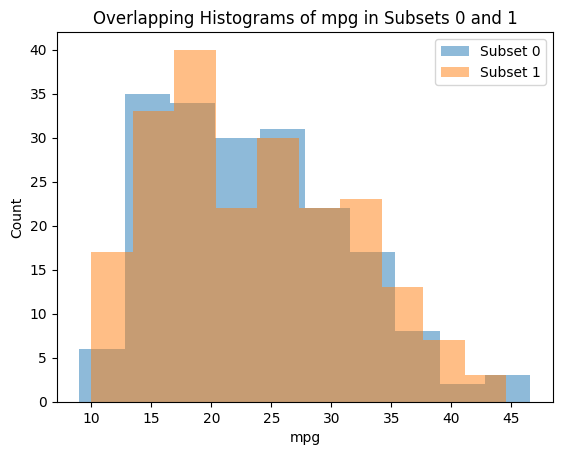

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# read in the two datasets from parts (d) and (e)

# extract the column to plot
variable = 'mpg'
x0 = subset0[variable]
x1 = subset1[variable]

# create overlapping histograms with semitransparent bars
plt.hist(x0, alpha=0.5, label='Subset 0')
plt.hist(x1, alpha=0.5, label='Subset 1')

# add a legend, axis labels, and a title
plt.legend()
plt.xlabel(variable)
plt.ylabel('Count')
plt.title('Overlapping Histograms of ' + variable + ' in Subsets 0 and 1')

# show the plot
plt.show()
